# 7.10. 
#### At http://www.statsci.org/data/oz/physical.html, you will find a dataset of measurements by M. Larner, made in 1996. These measurements include body mass, and various diameters. Build a linear regression of predicting the body mass from these diameters.
* Plot the residual against the fitted values for your regression.
* Now regress the cube root of mass against these diameters. Plot the
residual against the fitted values in both these cube root coordinates and
in the original coordinates.
* Use your plots to explain which regression is better.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
# import statsmodels.api as sm
from scipy.stats import linregress

%matplotlib inline

In [3]:
df2 = pd.read_table('physical.txt')
df2.head()

,Mass,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,77.0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,85.5,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,63.0,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,80.5,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,79.5,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0


In [10]:
y = df2.Mass
X = df2.drop('Mass', axis=1)
X.head()

,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()
lm.fit(X, y)
residual = lm.predict(X) - y
residual

0    -1.580892
1    -0.500839
2    -0.230191
3    -1.106940
4     1.021275
5     0.032598
6    -1.233566
7     0.383665
8    -1.583243
9     2.552344
10    0.922092
11   -0.512786
12    1.646161
13    2.105368
14    2.329716
15    0.830325
16   -0.878907
17    0.897981
18   -0.124727
19   -2.407698
20   -4.171882
21    1.610145
Name: Mass, dtype: float64

(-10, 10)

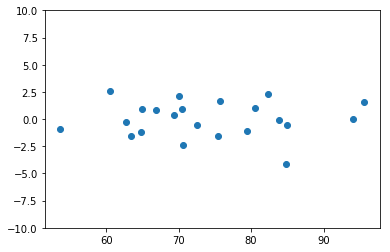

In [13]:
plt.scatter(lm.predict(X), residual)
plt.ylim([-10,10])

#### Now regress the cube root of mass against these diameters. Plot the residual against the fitted values in both these cube root coordinates and in the original coordinates.

In [33]:
newY = (y ** (1./3.))

In [34]:
newY

0     4.254321
1     4.405434
2     3.979057
3     4.317828
4     4.299874
5     4.546836
6     4.041240
7     4.101566
8     4.020726
9     3.870877
10    4.111449
11    4.179339
12    4.198336
13    4.081655
14    4.308869
15    4.041240
16    3.791393
17    4.000000
18    4.379519
19    4.179339
20    4.464745
21    4.546836
Name: Mass, dtype: float64

In [36]:
X.head()

,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0


In [37]:
lm.fit(X, newY)
residualCube = lm.predict(X) - newY
residualCube

0    -0.026243
1    -0.007233
2    -0.004892
3    -0.026709
4     0.015893
5     0.007340
6    -0.016127
7     0.010140
8    -0.040828
9     0.049348
10    0.016492
11   -0.017423
12    0.034709
13    0.035068
14    0.038270
15    0.015733
16    0.000694
17    0.012857
18    0.004882
19   -0.057234
20   -0.078409
21    0.033673
Name: Mass, dtype: float64

(-5, 5)

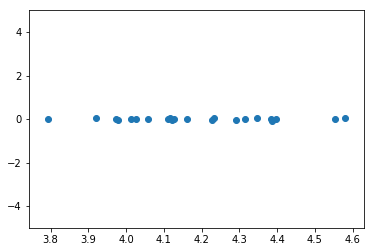

In [41]:
plt.scatter(lm.predict(X), residualCube)
plt.ylim([-5,5])

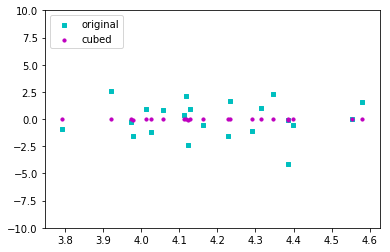

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(lm.predict(X), residual, s=10, c='c', marker="s", label='original')
ax1.scatter(lm.predict(X), residualCube, s=10, c='m', marker="o", label='cubed')
plt.legend(loc='upper left')
plt.ylim([-10,10])
plt.show()